In [141]:
'''import os
from pathlib import Path
import touch
myfile = im
Path(myfile).touch() #creating a new empty file
print("Files in a directory -->",os.listdir())
print("We can see a file created succesfully")
print("-----------------------------------------------------")
# If file exists, delete it.
if os.path.isfile(myfile):
    os.remove(myfile)
    print("Favtutor file deleted using remove() function")
    print("Current files in directory -->",os.listdir())
    print("-----------------------------------------------------")
else:
    # If it fails, inform the user.
    print("Error: %s file not found" % myfile)
'''

# Jika ada .DS_Store

'import os\nfrom pathlib import Path\nimport touch\nmyfile = im\nPath(myfile).touch() #creating a new empty file\nprint("Files in a directory -->",os.listdir())\nprint("We can see a file created succesfully")\nprint("-----------------------------------------------------")\n# If file exists, delete it.\nif os.path.isfile(myfile):\n    os.remove(myfile)\n    print("Favtutor file deleted using remove() function")\n    print("Current files in directory -->",os.listdir())\n    print("-----------------------------------------------------")\nelse:\n    # If it fails, inform the user.\n    print("Error: %s file not found" % myfile)\n'

In [142]:
import prepare_data
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy
import rawpy
from skimage.color import rgb2lab, lab2rgb

from utils.relight import relight_locally, apply_local_lights_rgb
from pipeline.pipeline import run_pipeline
from pipeline.pipeline_utils import normalize, denormalize, get_visible_raw_image, ratios2floats, white_balance, \
    get_metadata
from utils.gen_utils import check_dir
from noise_profiler.image_synthesizer import load_noise_model, synthesize_noisy_image_v2

In [143]:
import pickle
import sys
import numpy as np
import cv2
import os
import random
import argparse
from glob import glob
import scipy.io
from copy import deepcopy
import rawpy
import matplotlib.pyplot as plt
import prepare_data

from utils.relight import relight_locally, apply_local_lights_rgb
from pipeline.pipeline import run_pipeline
from pipeline.pipeline_utils import normalize, denormalize, get_visible_raw_image, ratios2floats, white_balance, \
    get_metadata
from utils.gen_utils import check_dir

from noise_profiler.image_synthesizer import load_noise_model, synthesize_noisy_image_v2
noise_model_path = './noise_profiler/h-gauss-s20-v1'
noise_model, iso2b1_interp_splines, iso2b2_interp_splines = load_noise_model(path=noise_model_path)

In [144]:
# For dng format image Path

main = '/Users/m_feriansyahrt/Documents/S2/PCL/Proyek/day2night/dataset'
day = main + '/day/'
night = main + '/night_real/clean_raw/'

noise_model_path = 'noise_profiler/h-gauss-s20-v1'
noise_model, iso2b1_interp_splines, iso2b2_interp_splines = load_noise_model(path=noise_model_path)

sampel = 64
im = os.path.join(day,sorted(os.listdir(day))[sampel])
im

relight_local = True

In [145]:
im

'/Users/m_feriansyahrt/Documents/S2/PCL/Proyek/day2night/dataset/day/RAW_000_2021_08_26_04_19_39_879_000050_000001340005.dng'

In [146]:
'''# For jpg format image Path

main_jpg = '/Users/m_feriansyahrt/Documents/S2/PCL/bdd100k/images/10k/test'
jpg = sorted(os.listdir(main_jpg))[sampel]
img_jpg = os.path.join(main_jpg,jpg)

im = cv2.imread(img_jpg)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)'''

"# For jpg format image Path\n\nmain_jpg = '/Users/m_feriansyahrt/Documents/S2/PCL/bdd100k/images/10k/test'\njpg = sorted(os.listdir(main_jpg))[sampel]\nimg_jpg = os.path.join(main_jpg,jpg)\n\nim = cv2.imread(img_jpg)\nim = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)\nplt.imshow(im)"

(3024, 4032, 3)


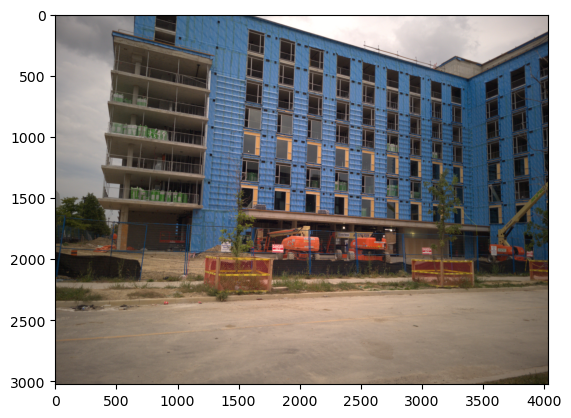

In [147]:
with rawpy.imread(im) as raw:
    rgb = raw.postprocess()
    
print(rgb.shape)
plt.imshow(rgb)

In [148]:
np.max(rgb)

255

In [149]:
def get_illum_normalized_by_g(illum_in_arr):
    return illum_in_arr[:, 0] / illum_in_arr[:, 1], illum_in_arr[:, 1] / illum_in_arr[:, 1], illum_in_arr[:, 2] / illum_in_arr[:, 1]

# load nighttime illuminants
gt_illum = scipy.io.loadmat('utils/gray_card_illum_dict.mat')
gt_illum = gt_illum['night_dict']

gt_illum[:, 0], gt_illum[:, 1], gt_illum[:, 2] = get_illum_normalized_by_g(gt_illum)

gt_illum_mean = np.mean(gt_illum, 0)
gt_illum_cov = np.cov(np.transpose(gt_illum))

In [150]:
if relight_local:
    light_mask_dirname = 'masks'
else:
    light_mask_dirname = None

In [151]:
# camera pipeline parameters
stages = ['raw', 'active_area_cropping', 'linearization', 'normal', 'white_balance',
          'demosaic', 'xyz', 'srgb', 'fix_orient', 'gamma', 'tone']

params = {
    'save_as': 'png',  # options: 'jpg', 'png', 'tif', etc.
    'white_balancer': 'default',  # options: default, or self-defined module
    'demosaicer': 'menon2007',  # options: '' for simple interpolation,
    #          'EA' for edge-aware,
    #          'VNG' for variable number of gradients,
    #          'menon2007' for Menon's algorithm
    'tone_curve': 'simple-s-curve',  # options: 'simple-s-curve', 'default', or self-defined module
}

In [152]:
img_bayer = get_visible_raw_image(im)
meta_data = get_metadata(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


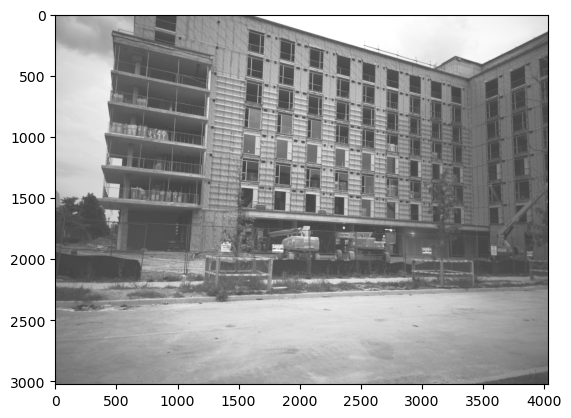

In [153]:
plt.imshow(cv2.cvtColor(img_bayer, cv2.COLOR_BGR2RGB))

In [154]:
iso_list = '50,1600,3200'.split(',')
for i in range(0, len(iso_list)):
    iso_list[i] = int(iso_list[i])
iso_list

[50, 1600, 3200]

In [155]:
'''Namespace(base_address='./dataset/day/', 
savefolderpath='synthetic_datasets', 
savefoldername='night', how_many_train=60, dim=True, 
relight=True, discard_black_level=False, clip=True, relight_local=True, 
min_num_lights=5, max_num_lights=5, min_light_size=0.5, 
max_light_size=1.0, save_light_masks=False, num_sat_lights=5, iso_list='1600,3200')'''

results_ = prepare_data.synth_night_imgs(img_bayer, meta_data, dim = True,
                                            relight = True, iso = iso_list[1],
                                            discard_black_level = False,
                                            _clip = True, relight_local = relight_local,
                                            min_num_lights = 2,
                                            max_num_lights = 3,
                                            min_light_size = 2,
                                            max_light_size = 3,
                                            num_sat_lights = 0,
                                            gt_illum_mean = gt_illum_mean, 
                                            gt_illum_cov = gt_illum_cov)

# num_sat_lights = berapa banyak "bola lampu dalam gambar"
# min_num_lights & max num_lights = seberapa terang
# min_light_size & max_light_size = seberapa terang

'''    
:param min_num_lights: Minimum number of local illuminants, in case of local relighting.
:param max_num_lights: Maximum number of local illuminants, in case of local relighting.
:param min_light_size: Minimum local light size as percent of image dimension, in case of local relighting.
:param max_light_size: Maximum local light size as percent of image dimension, in case of local relighting.
:param num_sat_lights: Number of small saturated local lights, in case of local relighting.'''

'    \n:param min_num_lights: Minimum number of local illuminants, in case of local relighting.\n:param max_num_lights: Maximum number of local illuminants, in case of local relighting.\n:param min_light_size: Minimum local light size as percent of image dimension, in case of local relighting.\n:param max_light_size: Maximum local light size as percent of image dimension, in case of local relighting.\n:param num_sat_lights: Number of small saturated local lights, in case of local relighting.'

In [156]:
if relight_local:
    example_night_synth, meta_data_night, local_lights = results_
else:
    example_night_synth, meta_data_night = results_
    local_lights = None

meta_data_night_raw = meta_data_night

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


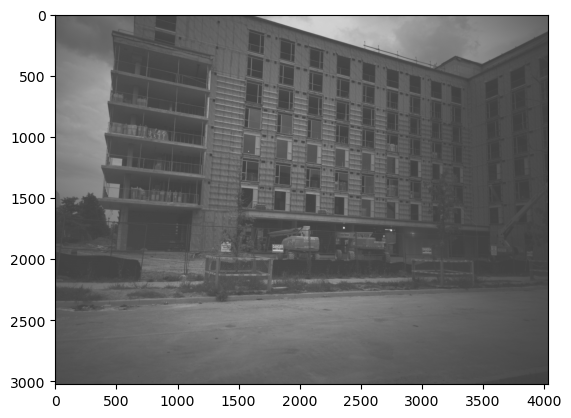

In [157]:
plt.imshow(cv2.cvtColor(example_night_synth,cv2.COLOR_BGR2RGB))

In [158]:
img_bayer,img_bayer.shape,example_night_synth, example_night_synth.shape

(array([[183, 118, 178, ..., 171, 302, 159],
        [134, 185, 135, ..., 302, 200, 305],
        [178, 116, 181, ..., 163, 293, 165],
        ..., 
        [ 94, 119,  96, ...,  94,  76,  91],
        [123,  93, 124, ...,  78,  95,  77],
        [ 96, 122,  95, ...,  96,  78,  90]], dtype=uint16),
 (3024, 4032),
 array([[103,  91, 102, ...,  93, 110,  90],
        [ 76, 104,  76, ..., 110,  78, 111],
        [102,  90, 103, ...,  91, 108,  92],
        ..., 
        [ 68,  79,  68, ...,  68,  65,  68],
        [ 80,  76,  81, ...,  67,  68,  66],
        [ 68,  80,  68, ...,  68,  65,  67]], dtype=uint16),
 (3024, 4032))

In [159]:
as_shot_neutral = meta_data_night['as_shot_neutral']  # keep as_shot_neutral
if relight_local:
    meta_data_night['as_shot_neutral'] = meta_data_night['avg_night_illuminant']  # modify as_shot_neutral
night_synth_srgb_avg = run_pipeline(example_night_synth, params=params, metadata=meta_data_night, stages=stages)
night_synth_srgb_avg = (night_synth_srgb_avg * 255).astype(np.uint8)
meta_data_night['as_shot_neutral'] = as_shot_neutral  # restore as_shot_neutral


(3024, 4032, 3)


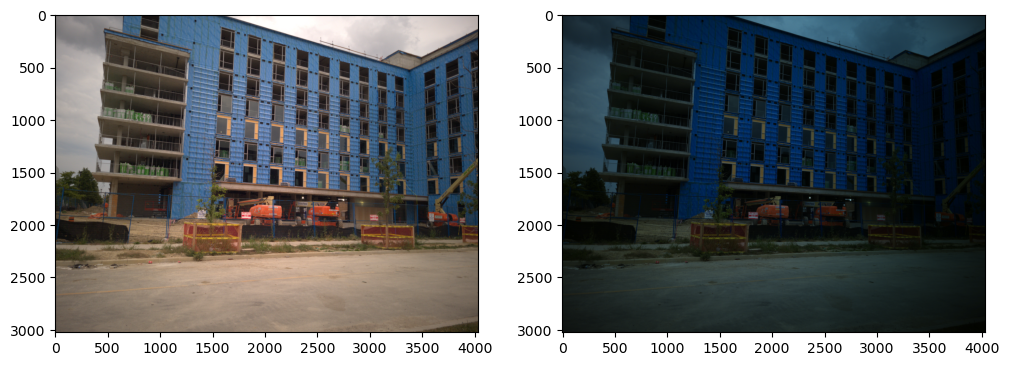

In [160]:
print(night_synth_srgb_avg.shape)

fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].imshow(rgb)
ax[1].imshow(night_synth_srgb_avg)

n = 10
fig.savefig(f'ex{n}.jpg')

In [161]:
noisy_night_image = synthesize_noisy_image_v2(example_night_synth, model=noise_model,
                                dst_iso=meta_data_night['iso'], min_val=0,
                                max_val=1023,
                                iso2b1_interp_splines=iso2b1_interp_splines,
                                iso2b2_interp_splines=iso2b2_interp_splines)

noisy_night_image = noisy_night_image.astype(np.uint16)

as_shot_neutral = meta_data_night['as_shot_neutral']  # keep as_shot_neutral
if relight_local:
    meta_data_night['as_shot_neutral'] = meta_data_night['avg_night_illuminant']  # modify as_shot_neutral
noisy_night_image_srgb = run_pipeline(noisy_night_image, params=params, metadata=meta_data_night, stages=stages)
noisy_night_image_srgb = (noisy_night_image_srgb * 255).astype(np.uint8)
meta_data_night['as_shot_neutral'] = as_shot_neutral  # restore as_shot_neutral

save_light_masks = True

if relight_local and save_light_masks and local_lights is not None:

    neutral_image = np.ones(night_synth_srgb_avg.shape, dtype=np.float32)

    # save individual local light masks
    for k, light in enumerate(local_lights[1:]):
        neutral_image_relight = apply_local_lights_rgb(neutral_image, [local_lights[0], light], clip=True,
                                                       invert_wb=True)
        # save combined light mask
        neutral_image_relight = apply_local_lights_rgb(neutral_image, local_lights, clip=True, invert_wb=True)


Text(0.5, 1.0, 'Noisy Synthetic Image')

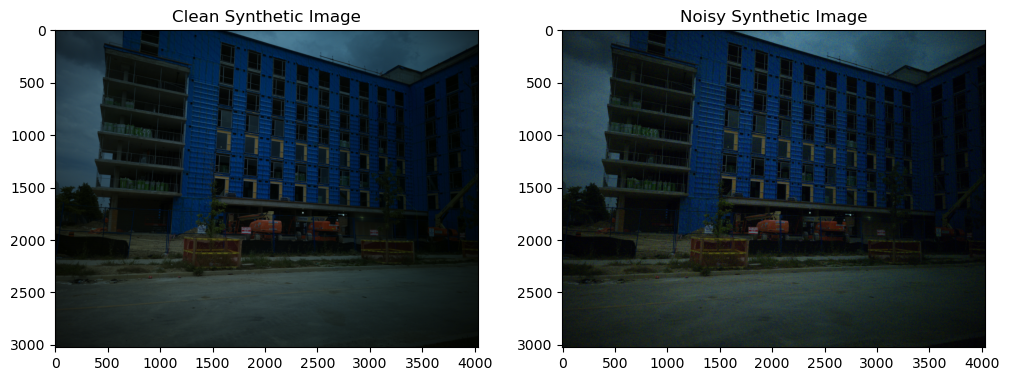

In [162]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(night_synth_srgb_avg)
ax[0].set_title('Clean Synthetic Image')
ax[1].imshow(noisy_night_image_srgb)
ax[1].set_title('Noisy Synthetic Image')

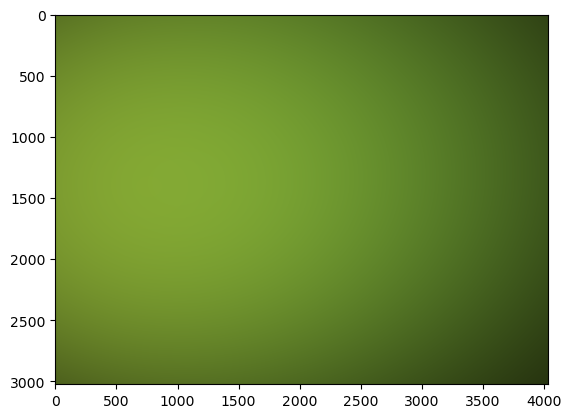

In [163]:
plt.imshow(neutral_image_relight)

In [164]:
# save image raw clean and raw noisy

path = '/Users/m_feriansyahrt/Documents/S2/PCL/Proyek/day2night/RAW_DATA/'
no = 1

# CLEAN
cv2.imwrite(path + f'clean_raw{no}' + '.png',
            example_night_synth.astype(np.uint16))
pickle.dump(meta_data_night_raw,
            open(path + f'metadata_raw{no}' + '.p', "wb"))

# NOISY
cv2.imwrite(path + f'noisy_raw{no}' + '.png',
            noisy_night_image)
#pickle.dump(meta_data_night_noisy,
#            open(path + f'noisy_raw{no}' + '.p', "wb"))



True

# SECOND PART Raw Processing

In [165]:
#Baseline
from raw_prc_pipeline.pipeline_utils import get_visible_raw_image, get_metadata
from raw_prc_pipeline.pipeline import PipelineExecutor, RawProcessingPipelineDemo
from raw_prc_pipeline import expected_landscape_img_height, expected_landscape_img_width, expected_img_ext
from utilsbaseline import fraction_from_json, json_read
from pathlib import Path

pipeline_params = {
    'tone_mapping': 'Flash', # options: Flash, Storm, Base, Linear, Drago, Mantiuk, Reinhard
    'illumination_estimation': 'gw', # ie algorithm, options: "gw", "wp", "sog", "iwp"
    'denoise_flg': True,
    'out_landscape_width': expected_landscape_img_width,
    'out_landscape_height': expected_landscape_img_height
}

pipeline_demo = RawProcessingPipelineDemo(**pipeline_params)

In [166]:
# rubah format metadata pickle jd json
import json
# open pickle file
with open(path + f'metadata_raw{no}' + '.p', 'rb') as infile:
    obj = pickle.load(infile)

# convert pickle object to json object
json_obj = json.loads(json.dumps(obj, default=str))

# write the json file
with open(
        os.path.splitext(path + f'metadata_raw{no}' + '.p')[0] + '.json',
        'w',
        encoding='utf-8'
    ) as outfile:
    json.dump(json_obj, outfile, ensure_ascii=False, indent=4)

In [167]:
#Load Raw Image
png_path = Path(path + f'noisy_raw{no}' + '.png')
raw_image = cv2.imread(str(png_path), cv2.IMREAD_UNCHANGED)
meta_data = json_read(path + f'metadata_raw{no}' + '.json', object_hook=fraction_from_json)

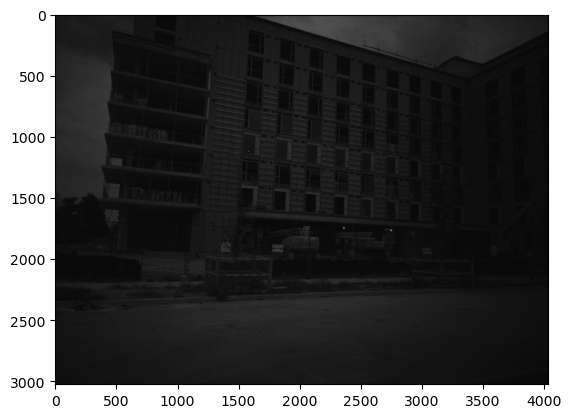

In [168]:
## linearize
linearized_image = pipeline_demo.linearize_raw(raw_image, meta_data)
plt.imshow(linearized_image, cmap='gray')

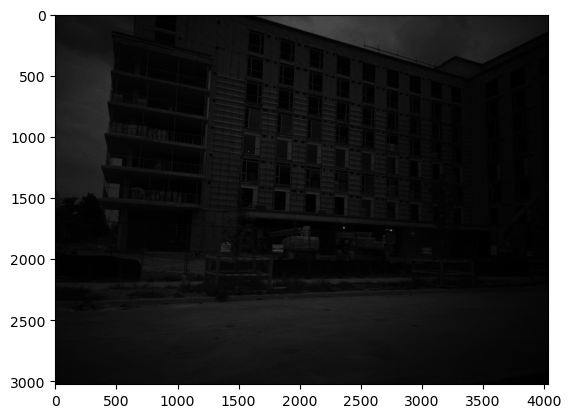

In [169]:
## normalize
normalized_image = pipeline_demo.normalize(linearized_image, meta_data)
plt.imshow(normalized_image, cmap='gray')

In [170]:
print(normalized_image.shape)

(3024, 4032)


In [171]:
def get_opencv_demsaic_flag(cfa_pattern, output_channel_order, alg_type='VNG'):
    # using opencv edge-aware demosaicing
    if alg_type != '':
        alg_type = '_' + alg_type
    if output_channel_order == 'BGR':
        if cfa_pattern == [0, 1, 1, 2]:  # RGGB
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_BG2BGR' + alg_type)
        elif cfa_pattern == [2, 1, 1, 0]:  # BGGR
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_RG2BGR' + alg_type)
        elif cfa_pattern == [1, 0, 2, 1]:  # GRBG
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_GB2BGR' + alg_type)
        elif cfa_pattern == [1, 2, 0, 1]:  # GBRG
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_GR2BGR' + alg_type)
        else:
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_BG2BGR' + alg_type)
            print("CFA pattern not identified.")
    else:  # RGB
        if cfa_pattern == [0, 1, 1, 2]:  # RGGB
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_BG2RGB' + alg_type)
        elif cfa_pattern == [2, 1, 1, 0]:  # BGGR
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_RG2RGB' + alg_type)
        elif cfa_pattern == [1, 0, 2, 1]:  # GRBG
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_GB2RGB' + alg_type)
        elif cfa_pattern == [1, 2, 0, 1]:  # GBRG
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_GR2RGB' + alg_type)
        else:
            opencv_demosaic_flag = eval('cv2.COLOR_BAYER_BG2RGB' + alg_type)
            print("CFA pattern not identified.")
    return opencv_demosaic_flag

def demosaic(bayer_image, cfa_pattern, output_channel_order='RGB', alg_type='VNG'):
    """
    Demosaic a Bayer image.
    :param bayer_image: Image in Bayer format, single channel.
    :param cfa_pattern: Bayer/CFA pattern.
    :param output_channel_order: Either RGB or BGR.
    :param alg_type: algorithm type. options: '', 'EA' for edge-aware, 'VNG' for variable number of gradients
    :return: Demosaiced image.
    """
    if alg_type == 'VNG':
        max_val = 255
        wb_image = (bayer_image * max_val).astype(dtype=np.uint8)
    else:
        max_val = 16383
        wb_image = (bayer_image * max_val).astype(dtype=np.uint16)

    if alg_type in ['', 'EA', 'VNG']:
        opencv_demosaic_flag = get_opencv_demsaic_flag(cfa_pattern, output_channel_order, alg_type=alg_type)
        demosaiced_image = cv2.cvtColor(wb_image, opencv_demosaic_flag)
    elif alg_type == 'menon2007':
        cfa_pattern_str = "".join(["RGB"[i] for i in cfa_pattern])
        demosaiced_image = demosaicing_CFA_Bayer_Menon2007(wb_image, pattern=cfa_pattern_str)
    else:
        raise ValueError('Unsupported demosaicing algorithm, alg_type = {}'.format(alg_type))

    demosaiced_image = demosaiced_image.astype(dtype=np.float32) / max_val

    return demosaiced_image

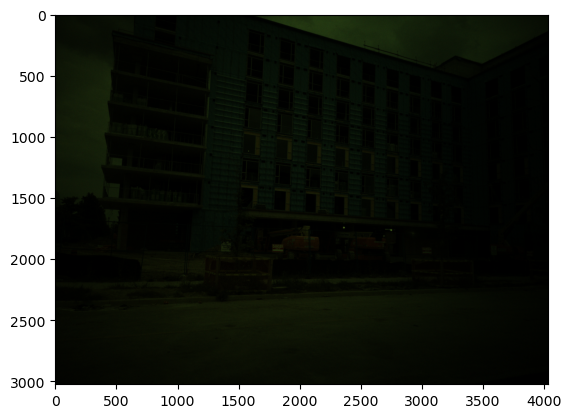

In [172]:
## demosaic


demosaic_image = demosaic(normalized_image, meta_data_night['cfa_pattern'])



plt.imshow(np.clip(demosaic_image, 0, 1))

In [173]:
print(demosaic_image.shape)

(3024, 4032, 3)


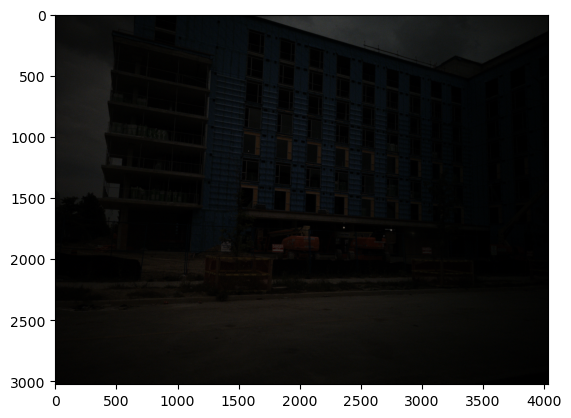

In [174]:
# Gray World AWB
white_balanced_image = pipeline_demo.white_balance(demosaic_image, meta_data_night)
plt.imshow(white_balanced_image)

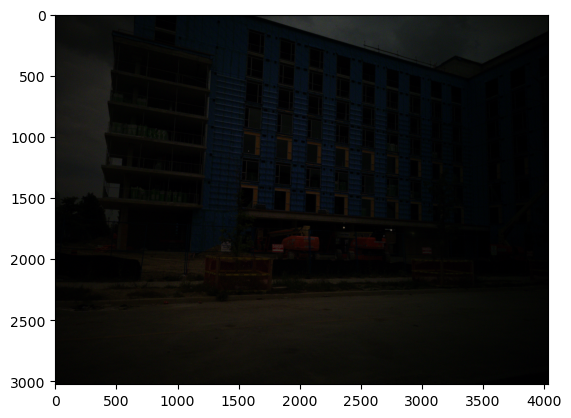

In [175]:
#convert sRGB
xyz_image = pipeline_demo.xyz_transform(white_balanced_image, meta_data_night)
srgb_image = pipeline_demo.srgb_transform(xyz_image, meta_data_night)
plt.imshow(srgb_image)

# SECOND PART Image Processing

In [176]:
# Denoising NLMeans

# INPUT BERUPA CITRA NOISY
#converted_img = cv2.cvtColor(demosaic_image, cv2.COLOR_GRAY2BGR)
srgb_image_uint = (srgb_image * 255).round().astype(np.uint8)
#srgb_image_uint=np.uint8(srgb_image)
im = cv2.fastNlMeansDenoisingColored(srgb_image_uint, None, 10, 10, 7, 15) 

Text(0.5, 1.0, 'Denoised')

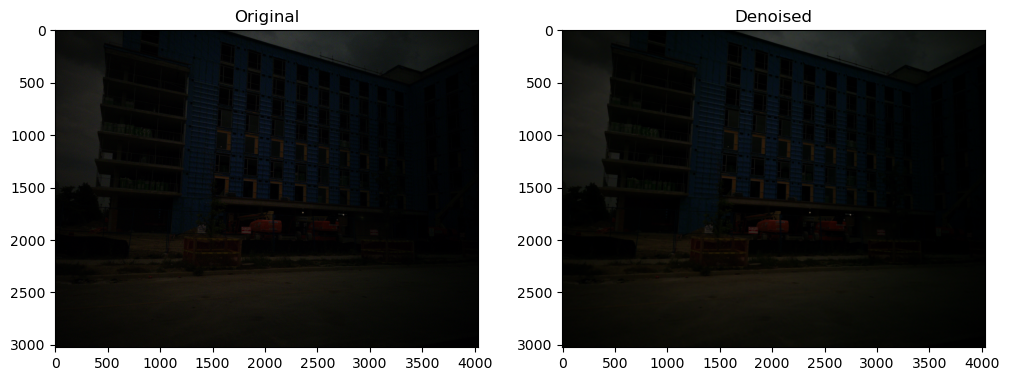

In [177]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(srgb_image_uint)
ax[0].set_title('Original')
ax[1].imshow(im)
ax[1].set_title('Denoised')


In [178]:
## Contrast Enhancement

In [179]:
# Local Contrast Enhancement

def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.float64(ycbcr)

def adjust_gamma(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype('float64')
    return cv2.LUT(image, table)

def gamma_filter(image, gamma):
    # Gamma correction 
    # Increase gamma for darkening, decrease for brightening
    filtr = np.power(image, gamma).clip(0, 255).astype(np.uint8) 
    return filtr

def luminance_corr(image,gamma):
    im_ycbcr = rgb2ycbcr(image)
    Y = im_ycbcr[:,:,0]
    M = gamma_filter(Y,gamma)
    eks = gamma ** ((0.5 - (1-M))/0.5)
    Y_ = []
    for i,j in zip(Y,eks):
        temp =[]
        for val,eksponen in zip(i,j):
            temp.append(val**eksponen.astype("float32"))
        Y_.append(temp)
    Y_ = np.array(Y_)
    return Y,Y_

def new_ycbcr(image,lum):
    origin = rgb2ycbcr(image)
    im_ycbcr = rgb2ycbcr(image)
    im_ycbcr[:,:,0] = lum
    return origin,im_ycbcr

In [180]:
gamma = 1.5
Y,Y_ = luminance_corr(im,gamma)

In [181]:
Y

array([[  9.615,   9.316,   9.316, ...,  11.348,  11.462,  11.348],
       [  9.615,   9.316,   9.316, ...,  11.935,  11.462,  11.935],
       [  9.316,   9.789,  10.202, ...,  11.935,  11.348,  11.935],
       ..., 
       [  3.761,   3.761,   3.761, ...,   0.   ,   0.   ,   0.   ],
       [  3.761,   3.761,   3.761, ...,   0.   ,   0.   ,   0.   ],
       [  3.761,   3.761,   3.174, ...,   0.   ,   0.   ,   0.   ]])

In [182]:
Y_

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

Text(0.5, 0.98, 'Luminance Corr (Y Channel)')

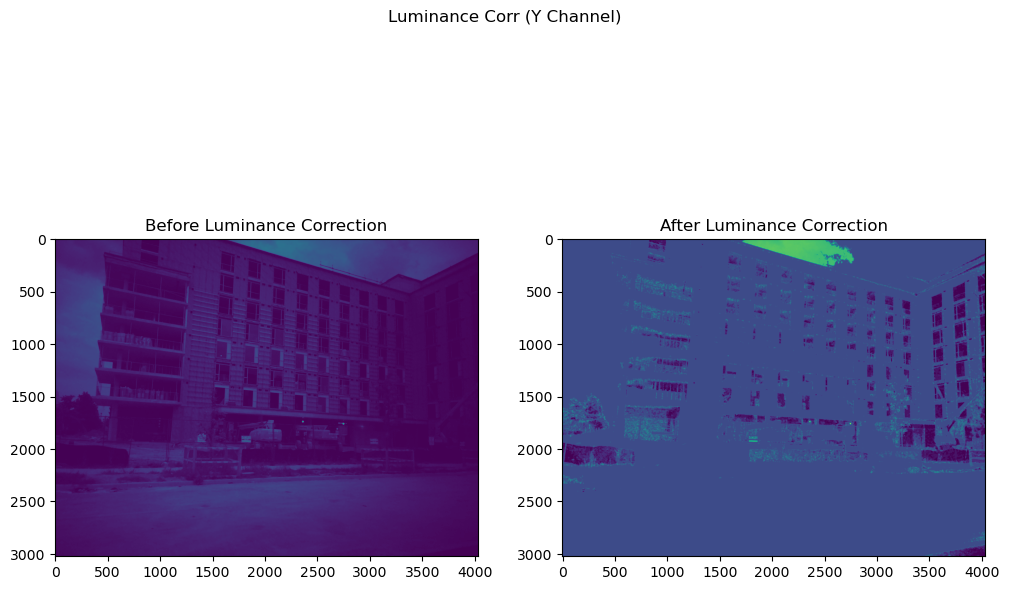

In [183]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(Y)
ax[0].set_title('Before Luminance Correction')
ax[1].imshow(Y_)
ax[1].set_title('After Luminance Correction')

fig.suptitle('Luminance Corr (Y Channel)')

Text(0.5, 1.0, 'After LCC (YCbCr Color Space)')

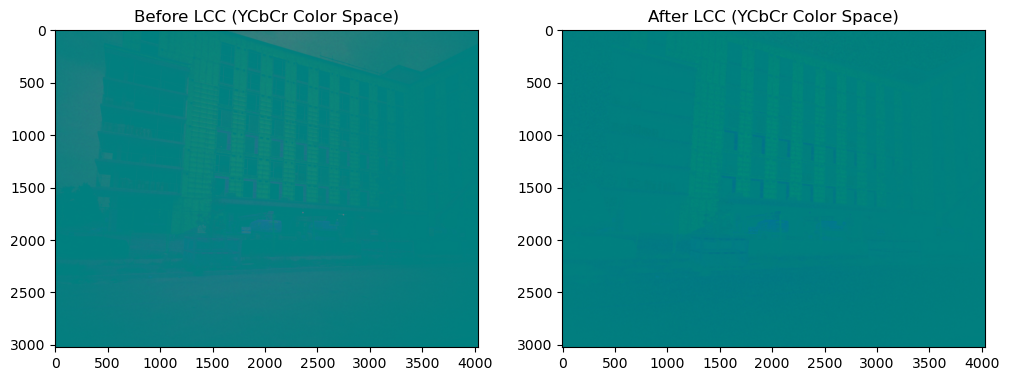

In [184]:
old_im_ycbcr, new_im_ycbcr = new_ycbcr(im,Y_)

fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(old_im_ycbcr.astype(np.uint8))
ax[0].set_title('Before LCC (YCbCr Color Space)')
ax[1].imshow(new_im_ycbcr.astype(np.uint8))
ax[1].set_title('After LCC (YCbCr Color Space)')


In [185]:
def contrast_fixing(im_ycbcr,Y_stretched):
    # Extract the Y (luminance) channel from YCbCr
    Y = im_ycbcr[:, :, 0]

    # Compute the chroma radius (Cb and Cr channels) and chrominance
    Cb = im_ycbcr[:, :, 1]
    Cr = im_ycbcr[:, :, 2]
    chroma_radius = np.sqrt(Cb ** 2 + Cr ** 2)

    # Define thresholds for dark pixels
    luminance_threshold = 0.14
    chroma_threshold = 0.07

    # Find dark pixels
    dark_pixel_mask = (Y < luminance_threshold) & (chroma_radius < chroma_threshold)

    # Calculate cumulative histograms for Y
    hist_y = cv2.calcHist([Y], [0], None, [256], [0, 256])
    cumulative_hist_y = np.cumsum(hist_y)

    # Calculate cumulative histograms for Y hat -> After applying LCC
    hist_y_hat = cv2.calcHist([Y_stretched], [0], None, [256], [0, 256])
    cumulative_hist_y_hat = np.cumsum(hist_y_hat)

    # If there are dark pixels, calculate lower range
    if np.any(dark_pixel_mask):
        # Determine the threshold for the darkest 30% pixels
        total_pixels = Y.size
        percentile_threshold = 0.3
        threshold_value = int(total_pixels * percentile_threshold)

        # Find the bin value corresponding to the threshold in cumulative_hist_y_hat
        lower_range_y_hat = np.where(cumulative_hist_y_hat >= threshold_value)[0][0]

        # Find the bin value corresponding to the threshold in cumulative_hist_y
        lower_range_y = np.where(cumulative_hist_y >= threshold_value)[0][0]

        # Calculate lower range difference
        lower_range_difference = lower_range_y_hat - lower_range_y

        # Clip lower and upper ranges (maximum 50 bins)
        lower_range_difference = max(0, min(lower_range_difference, 50))

        # Apply histogram stretching to Y channel
        Y_stretched = cv2.normalize(Y, None, lower_range_difference, 255, cv2.NORM_MINMAX)
    else:
        # If no dark pixels, define lower range as the second percentile
        lower_range_y_hat = np.percentile(Y_stretched, 2)
        Y_stretched = Y

    # Calculate the upper range (always corresponds to the 98th percentile)
    upper_range_y_hat = np.percentile(Y_stretched, 98)

    # Stretch the image histogram using the determined ranges
    Y_stretched = cv2.normalize(Y_stretched, None, 0, 255, cv2.NORM_MINMAX)

    # Update the Y channel in the YCbCr image
    im_ycbcr[:, :, 0] = Y_stretched
    return im_ycbcr

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float64)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

In [186]:
newY_ = new_im_ycbcr[:,:,0] # after luminance correction
im_ycbcr = contrast_fixing(old_im_ycbcr.astype(np.uint8),newY_.astype(np.uint8))
im_rgb = ycbcr2rgb(im_ycbcr)

Text(0.5, 1.0, 'After LCC & Contrast Fixing (RGB)')

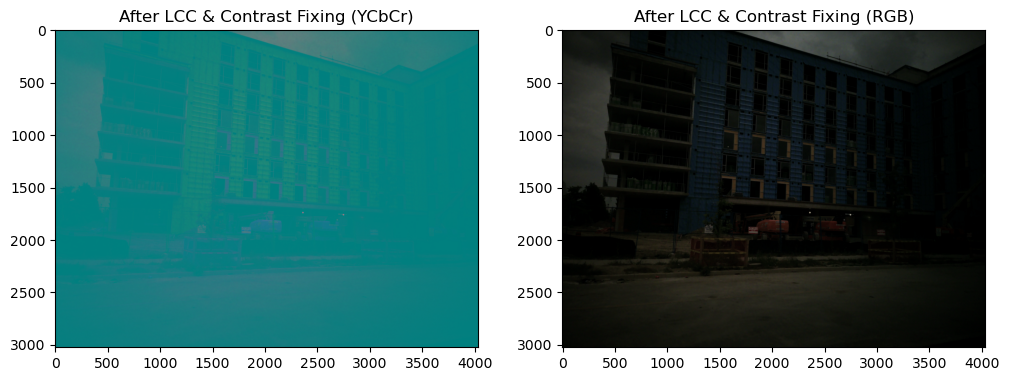

In [187]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_ycbcr)
ax[0].set_title('After LCC & Contrast Fixing (YCbCr)')
ax[1].imshow(im_rgb)
ax[1].set_title('After LCC & Contrast Fixing (RGB)')

Text(0.5, 1.0, 'After LCC & Contrast Fixing (RGB)')

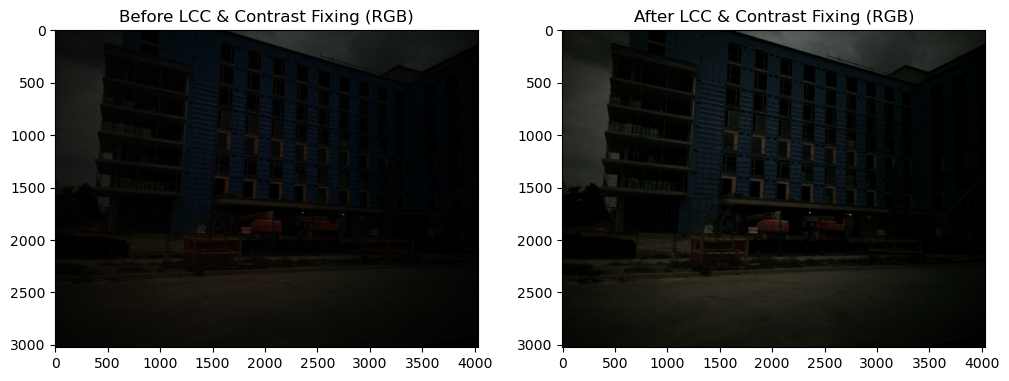

In [188]:
fig,ax = plt.subplots(1,2,figsize = [12,8])

ax[0].imshow(srgb_image_uint)
ax[0].set_title('Before LCC & Contrast Fixing (RGB)')
ax[1].imshow(im_rgb)
ax[1].set_title('After LCC & Contrast Fixing (RGB)')

In [189]:
def saturation_fixing(rgb_after_lccC,ycbcr_before_lcc,ycbcr_after_lcc):
    Y = ycbcr_before_lcc[:,:,0]
    Y_ = ycbcr_after_lcc[:,:,0]
    
    R = rgb_after_lccC[:,:,0]
    G = rgb_after_lccC[:,:,1]
    B = rgb_after_lccC[:,:,2]
    
    init = np.zeros((im_rgb.shape[0],im_rgb.shape[1],im_rgb.shape[2]))
    init[:,:,0], init[:,:,1], init[:,:,2]  = R + Y, G + Y, B + Y    # C + Y
    
    init2 = np.zeros((im_rgb.shape[0],im_rgb.shape[1],im_rgb.shape[2]))
    init2[:,:,0], init2[:,:,1], init2[:,:,2]  = R - Y, G - Y, B - Y # C - Y
    
    idx_zero = np.where(Y == 0.0)
    for i,j in zip(idx_zero[0],idx_zero[1]):
        Y[i][j] = 10e-06
        
    div_factor = Y_/Y
    
    init[:,:,0], init[:,:,1], init[:,:,2] = 0.5 * div_factor * init[:,:,0], 0.5 * div_factor * init[:,:,1], 0.5 * div_factor * init[:,:,2]
    
    rgb_saturation_fixed = init + init2
    return rgb_saturation_fixed

In [190]:
im_rgb_s = saturation_fixing(im_rgb,old_im_ycbcr,new_im_ycbcr)

Text(0.5, 1.0, 'LCC, Con&SatFixing')

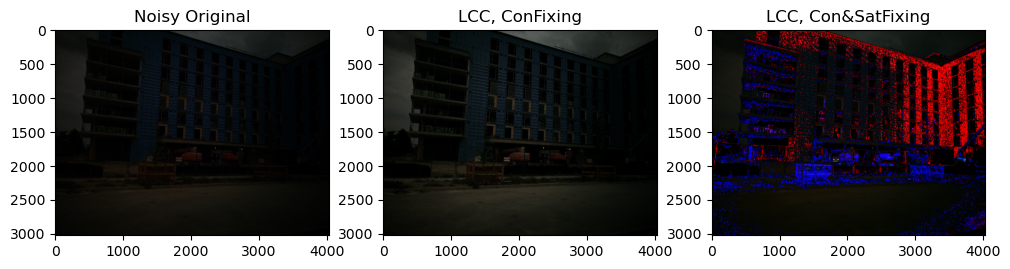

In [191]:
fig,ax = plt.subplots(1,3,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(srgb_image_uint)
ax[0].set_title('Noisy Original')
ax[1].imshow(im_rgb)
ax[1].set_title('LCC, ConFixing')
ax[2].imshow(im_rgb_s.astype(np.uint8))
ax[2].set_title('LCC, Con&SatFixing')

In [192]:
# Global Mean Contrast

def glob_mean_contrast(im,beta):
    r,g,b = im[:,:,0],im[:,:,1],im[:,:,2]
    r_mean,g_mean,b_mean = np.mean(r),np.mean(g),np.mean(b)
    
    def calc(channel,mean):
        glob_mean = mean + beta * (channel-mean)
        return glob_mean
    
    r_glob,g_glob,b_glob = calc(r,r_mean),calc(g,g_mean),calc(b,b_mean)
    rgb_glob = np.dstack((r_glob,g_glob,b_glob))
    return rgb_glob

Text(0.5, 1.0, 'After Glob Contrast')

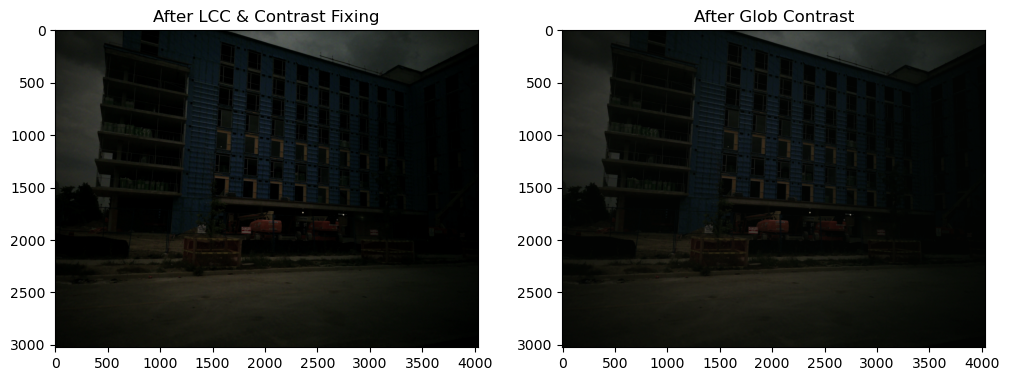

In [193]:
im_glob = glob_mean_contrast(im_rgb,0.8) # Change beta value for tuning

fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_rgb)
ax[0].set_title('After LCC & Contrast Fixing')
ax[1].imshow(im_glob.astype(np.uint8))
ax[1].set_title('After Glob Contrast')

In [194]:
# S-Curve Correction

def s_curve_corr1(image,alpha,lambda_val):
    im_zeros = np.zeros((image.shape[0],image.shape[1],image.shape[2]))
    for ch in range(image.shape[2]):
        c = image[:,:,ch]
        for idx_w,w in enumerate(c):
            for idx_h,h in enumerate(w):
                if h >= alpha:
                    pix = alpha + ((1 - alpha) * (((h - alpha)/(1 - alpha))**lambda_val))
                else:
                    pix = alpha - (alpha * ((1 - (h/alpha))**lambda_val))
                im_zeros[idx_w,idx_h,ch] = pix
    return im_zeros

def s_curve_corr2(image,alpha,lambda_value):
    im_zeros = np.zeros((image.shape[0],image.shape[1],image.shape[2]))
    for channel in range(3):  
        C = image[:, :, channel]
        S_CurveC = np.where(C >= alpha, alpha + (1 - alpha) * ((C - alpha) / (1 - alpha)) ** lambda_value, alpha - alpha * (1 - (C / alpha)) ** lambda_value)
        im_zeros[:, :, channel] = S_CurveC
    return im_zeros


In [195]:
alpha = 0.5
lambda_value = 1.1

im_s_curve1 = s_curve_corr1(im_glob,alpha,lambda_value)
im_s_curve2 = s_curve_corr2(im_glob,alpha,lambda_value)

/var/folders/gh/0706fvw967vcpx7cqmhdhmth0000gn/T/ipykernel_1193/3847972735.py:20: RuntimeWarning: invalid value encountered in power
  S_CurveC = np.where(C >= alpha, alpha + (1 - alpha) * ((C - alpha) / (1 - alpha)) ** lambda_value, alpha - alpha * (1 - (C / alpha)) ** lambda_value)


Text(0.5, 1.0, 'After S-Curve Correction 2')

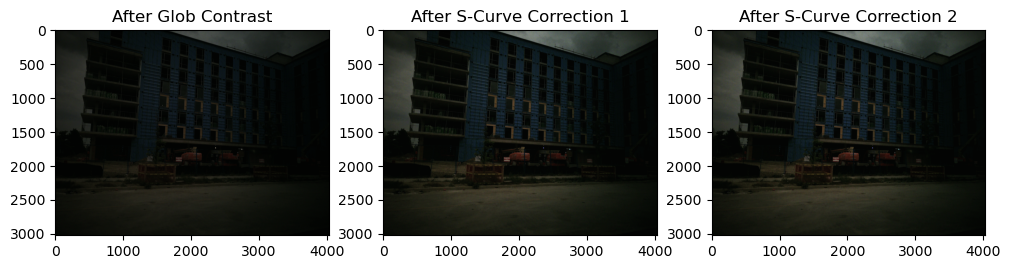

In [196]:
fig,ax = plt.subplots(1,3,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_glob.astype(np.uint8))
ax[0].set_title('After Glob Contrast')
ax[1].imshow(im_s_curve1.astype(np.uint8))
ax[1].set_title('After S-Curve Correction 1')
ax[2].imshow(im_s_curve2.astype(np.uint8))
ax[2].set_title('After S-Curve Correction 2')

In [197]:
# Histogram Stretching

def histogram_stretching(image):
    min_value = np.min(image)
    max_value = np.max(image)

    stretched_image = 255 * (image - min_value) / (max_value - min_value)
    return stretched_image

Text(0.5, 1.0, 'After Stretched')

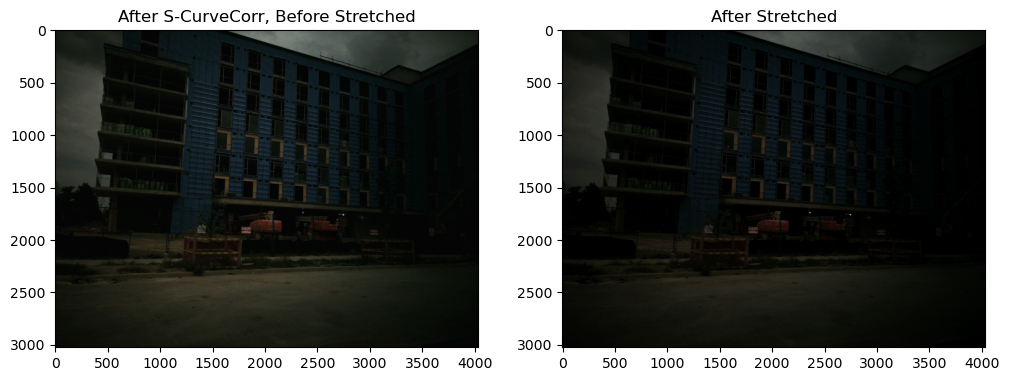

In [198]:
im_histed = histogram_stretching(im_s_curve1)

fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_s_curve2.astype(np.uint8))
ax[0].set_title('After S-CurveCorr, Before Stretched')
ax[1].imshow(im_histed.astype(np.uint8))
ax[1].set_title('After Stretched')

In [199]:
# Conditional Contrast Correction

def cond_contrast_corr(image,lower_t,upper_t,alpha,lambda_val,gamma):

    histed_ycbcr = rgb2ycbcr(image)
    luminance = histed_ycbcr[:,:,0]
    mean_luminance = np.mean(luminance)
    
    if mean_luminance <= lower_t:
        cond_im = s_curve_corr1(image,alpha,lambda_val)
        txt = 'S-Curve Correction Applied'
    
    elif mean_luminance >= upper_t:
        cond_im = gamma_filter(image,gamma) 
        txt = 'Gamma Filter Applied'
    
    else:
        cond_im = image
        txt = 'No Conditional Contrast Correction method Applied'
        
    return cond_im,mean_luminance,txt

In [200]:
lower_t = 5
upper_t = 100
gamma = 1.15
alpha = 0.5
lambda_value = 1.1

im_cond_corr,mean_Y,txt = cond_contrast_corr(im_histed,lower_t,upper_t,alpha,lambda_value,gamma)
print('Mean of Luminance Channel from : ', mean_Y)
print('Adjust the threshold according to this value')

Mean of Luminance Channel from :  13.7040938205
Adjust the threshold according to this value


Text(0.5, 1.0, 'No Conditional Contrast Correction method Applied')

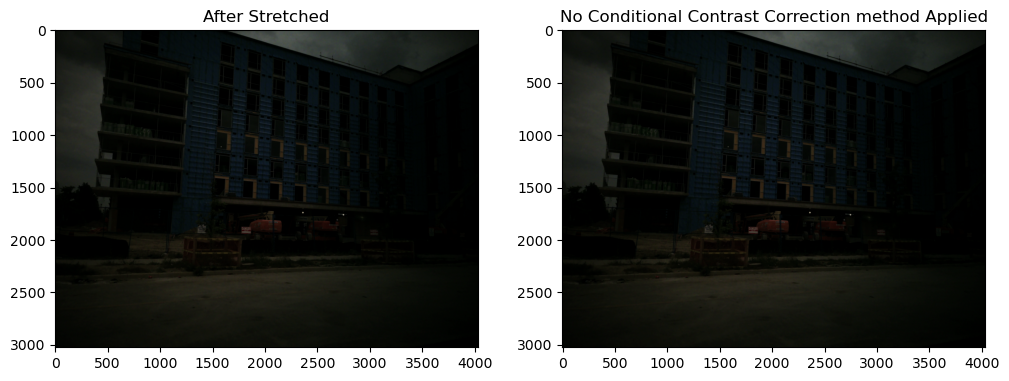

In [201]:
im_histed = histogram_stretching(im_s_curve1)

fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_histed.astype(np.uint8))
ax[0].set_title('After Stretched') 
ax[1].imshow(im_cond_corr.astype(np.uint8))
ax[1].set_title(txt)

In [202]:
## Sharpening

In [203]:
# Unsharp Masking

def unsharp_masking(image,sigma): 
    im_zeros = np.zeros((image.shape[0],image.shape[1],image.shape[2]))
    
    for ch in range(image.shape[2]):    
        gaussian_filtered = cv2.GaussianBlur(image[:,:,ch], (0, 0), sigma)
        sharpened_image = image[:,:,ch] + (image[:,:,ch] - gaussian_filtered)
        sharpened_image = np.clip(sharpened_image, 0, 255)
        im_zeros[:,:,ch] = sharpened_image
        
    return im_zeros


Text(0.5, 1.0, 'After Unsharp Masking')

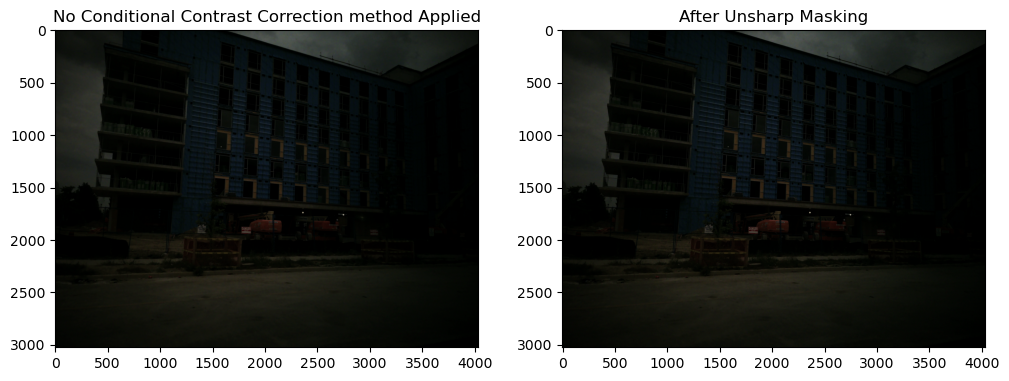

In [204]:
sigma = 1.5 
im_unsharped_masking = unsharp_masking(im_cond_corr,sigma)

fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_cond_corr.astype(np.uint8))
ax[0].set_title(txt)
ax[1].imshow(im_unsharped_masking.astype(np.uint8))
ax[1].set_title('After Unsharp Masking')

In [205]:
## AWB

In [206]:
# Grayness Index

def rgb2lab(rgb, gamma):
    # Ensure input is in the range [0, 255] and convert to float
    rgb = np.clip(rgb, 0, 255).astype(float)

    # Normalize RGB values to the range [0, 1]
    rgb /= 255.0

    # Apply gamma correction
    rgb = np.where(rgb <= 0.04045, rgb / (gamma * 12.92), ((rgb / gamma + 0.055) / (1.055)) ** (2.4 * gamma))

    # Linear transformation to XYZ color space
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    x = 0.4124564 * r + 0.3575761 * g + 0.1804375 * b
    y = 0.2126729 * r + 0.7151522 * g + 0.0721750 * b
    z = 0.0193339 * r + 0.1191920 * g + 0.9503041 * b

    # Normalize to D65 white point
    x /= 0.950456
    z /= 1.088754

    # Nonlinear transformation to LAB color space using vectorized operations
    epsilon = 6 / 29
    f = np.where(y > epsilon, y ** (1/3), (y / (3 * epsilon ** 2) + 4/29))
    l = 116 * f - 16
    a = (x - y) * 500
    b = (y - z) * 200

    return np.stack((l, a, b), axis=-1)

def lab2rgb(lab, gamma):
    # Nonlinear transformation from LAB to XYZ color space
    epsilon = 6 / 29
    f_inv = lambda t: np.where(t > epsilon, t ** (1/3), (t / (3 * epsilon ** 2) + 4/29))
    y = (lab[:, :, 0] + 16) / 116
    x = lab[:, :, 1] / 500 + y
    z = y - lab[:, :, 2] / 200

    x = f_inv(x)
    y = f_inv(y)
    z = f_inv(z)

    x *= 0.950456
    z *= 1.088754

    # Linear transformation from XYZ to RGB color space
    r = 3.2404542 * x - 1.5371385 * y - 0.4985314 * z
    g = -0.9692660 * x + 1.8760108 * y + 0.0415560 * z
    b = 0.0556434 * x - 0.2040259 * y + 1.0572252 * z

    # Apply gamma correction
    r = np.where(r <= 0.0031308, 12.92 * r, (1.055 * r) ** (1/gamma) - 0.055)
    g = np.where(g <= 0.0031308, 12.92 * g, (1.055 * g) ** (1/gamma) - 0.055)
    b = np.where(b <= 0.0031308, 12.92 * b, (1.055 * b) ** (1/gamma) - 0.055)

    # Scale RGB values to the range [0, 255]
    rgb = np.stack((r, g, b), axis=-1) * 255

    return np.clip(rgb, 0, 255).astype(np.uint8)

def grayness_index(image,threshold):
    
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    #lab_image = rgb2lab(image)
    #lab_image = rgb2lab(im_unsharped_masking,gamma)

    # Calculate the Grayness Index using the L channel
    l_channel = lab_image[:, :, 0]
    grayness_index = l_channel  
    achromatic_pixels = grayness_index <= threshold
    correction_factor = np.mean(l_channel[achromatic_pixels])
    balanced_l_channel = l_channel / correction_factor

    # Merge the LAB channels back
    balanced_lab_image = lab_image.copy()
    balanced_lab_image[:, :, 0] = balanced_l_channel

    # Convert the balanced LAB image back to BGR color space
    balanced_image = cv2.cvtColor(balanced_lab_image, cv2.COLOR_Lab2RGB)
    #balanced_image = lab2rgb(balanced_lab_image)
    #balanced_image = lab2rgb(balanced_lab_image,gamma)
    return balanced_image

Text(0.5, 1.0, 'After Grayness Index')

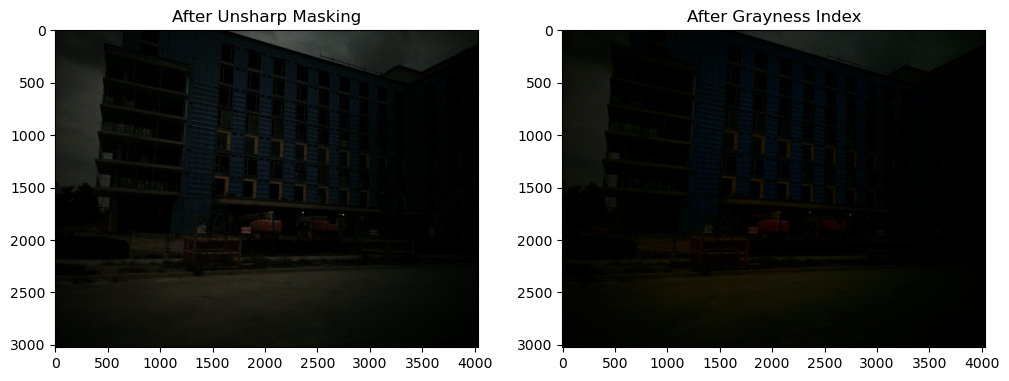

In [207]:
threshold = 7 # -> Tune the threshold value
im_awb = grayness_index(im_unsharped_masking.astype(np.uint8),threshold)

fig,ax = plt.subplots(1,2,figsize = [12,8])
#ax[0].imshow(rgb)
ax[0].imshow(im_unsharped_masking.astype(np.uint8))
ax[0].set_title('After Unsharp Masking')
ax[1].imshow(im_awb)
ax[1].set_title('After Grayness Index')

# FINAL COMPARATION

Text(0.5, 1.0, 'Noisy Synthetic Night Image')

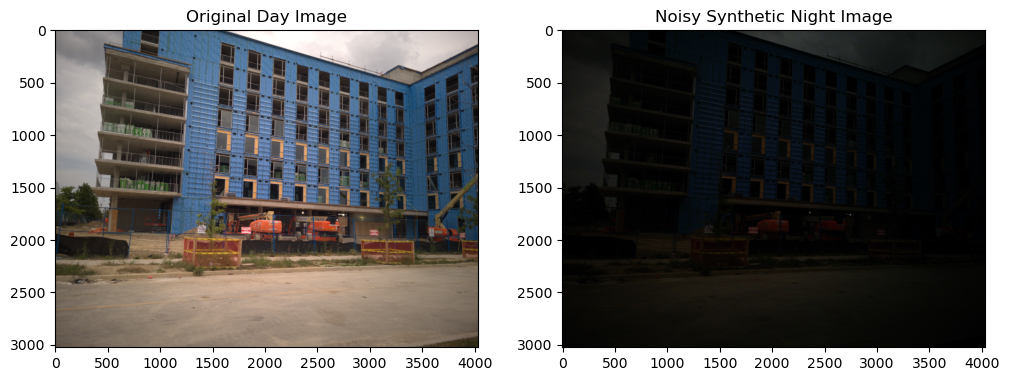

In [208]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].imshow(rgb)
ax[0].set_title('Original Day Image')
ax[1].imshow(srgb_image_uint)
ax[1].set_title('Noisy Synthetic Night Image')

Text(0.5, 1.0, 'Noisy Synthetic Night Image (After Unsharp Masking)')

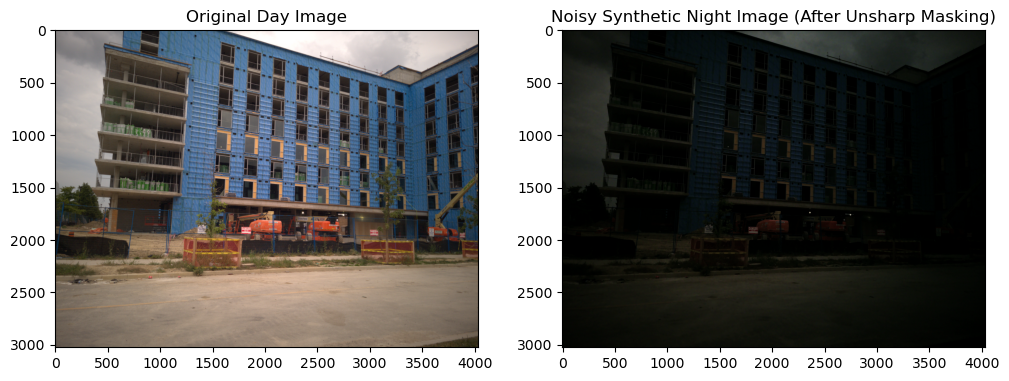

In [209]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].imshow(rgb)
ax[0].set_title('Original Day Image')
ax[1].imshow(im_unsharped_masking.astype(np.uint8))
ax[1].set_title('Noisy Synthetic Night Image (After Unsharp Masking)')

Text(0.5, 1.0, 'Noisy Synthetic Night Image (With Grayness Index)')

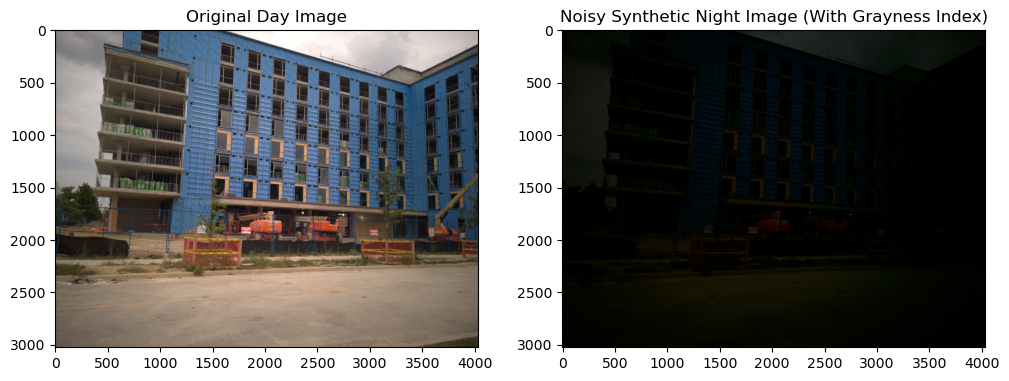

In [210]:
fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].imshow(rgb)
ax[0].set_title('Original Day Image')
ax[1].imshow(im_awb)
ax[1].set_title('Noisy Synthetic Night Image (With Grayness Index)')